In [1]:
#inbuilt dataset yfinance
#first time install yfinance 
#!pip install yfinance

In [2]:
import yfinance as yf

In [3]:
#GOOGL company
#To lad Data of GOOGL company from 27-jan-2019 to 11-feb-2023
df=yf.download('GOOGL','2019-01-27','2023-02-11')
#date format yyyy-mm-dd


[*********************100%%**********************]  1 of 1 completed


In [4]:
df.head()

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2019-01-28  54.503502  54.668499  53.730499  53.993000  53.993000  29334000
2019-01-29  54.051998  54.236500  53.300999  53.502998  53.502998  19704000
2019-01-30  53.868000  54.976002  53.832001  54.899502  54.899502  29452000
2019-01-31  55.612000  56.383499  55.262501  56.294498  56.294498  40232000
2019-02-01  56.114498  56.720001  55.712502  55.931000  55.931000  33116000

In [5]:
df['Close']

Date
2019-01-28     53.993000
2019-01-29     53.502998
2019-01-30     54.899502
2019-01-31     56.294498
2019-02-01     55.931000
                 ...    
2023-02-06    102.900002
2023-02-07    107.639999
2023-02-08     99.370003
2023-02-09     95.010002
2023-02-10     94.570000
Name: Close, Length: 1019, dtype: float64

In [6]:
df.shape

(1019, 6)

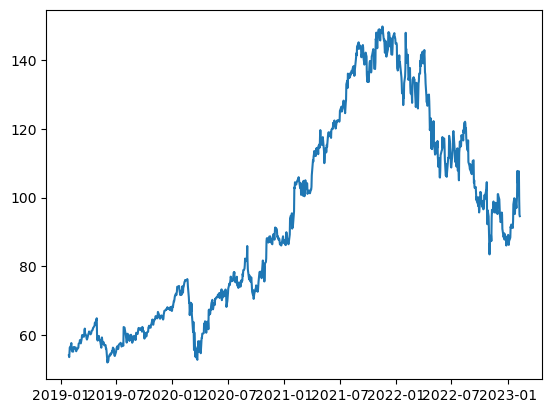

In [7]:
#visualise time series 
import matplotlib.pyplot as plt
plt.plot(df['Close'])
plt.show()

In [8]:
#clearly show , given time series data is non-stationary 
#check Given time series data is staionary or non-stationary :
#use different -different methods '
#1. use ADFULLER method :  adfuller inbuilt class which define in stattools class -->tsa class
#--> statsmodels inbuilt package 
from statsmodels.tsa.stattools import adfuller

In [9]:
#create a function
def adf_test(X):   #adf_test() user defined function
    result=adfuller(X) #adfuller() inbuilt function which define in 
    #adfuller inbuilt  and result user variable
    print("ADF Statistics : %.2f" %result[0])  
    print("P-value : %.2f"%result[1])
    if result[1]<=0.05:
        print("Reject null hypothesis,Give Time series data is Stationary")
    else:
        print("""Fail to reject the null hypothesis,Give Time series data
        is not Stationary""")

In [10]:
#call in mian program
adf_test(df['Close'])

ADF Statistics : -1.46
P-value : 0.55
Fail to reject the null hypothesis,Give Time series data
        is not Stationary


In [11]:
#2nd method : - 

In [12]:
df.shape

(1019, 6)

In [13]:
df1=df[['Close']]
df1.shape[0]

1019

In [14]:
df1.head()

Close
Date                 
2019-01-28  53.993000
2019-01-29  53.502998
2019-01-30  54.899502
2019-01-31  56.294498
2019-02-01  55.931000

In [15]:
#to store no. of records in given dataframe df1
n=df1.shape[0]
print("no. of records : ",n)

no. of records :  1019


In [16]:
#divide total record into 2 parts
split=n//2   #floor division , to return before decimal no. means return integer value
print(split) #split user defined variable

509


In [17]:
#first series X1
X1=df1[0:split] #start=0 stop=131-1=130  first series
X2=df1[split:]  #: start =131 and stop =till end  second series

In [18]:
X1.shape,X2.shape

((509, 1), (510, 1))

In [19]:
#find the mean of both series X1 and X2
m1=X1.mean()
m2=X2.mean() 
print("Mean of First Series : ",m1)
print("Mean of second Series : ",m2)

Mean of First Series :  Close    68.178868
dtype: float64
Mean of second Series :  Close    119.376429
dtype: float64


In [20]:
#similarly find the variance of both series X1 and X2
v1=X1.var()  #var() inbuilt function
v2=X2.var() 
print("Variance of First Series : ",v1)
print("Variance of second Series : ",v2)

Variance of First Series :  Close    113.614145
dtype: float64
Variance of second Series :  Close    313.820203
dtype: float64


In [21]:
#clearly understand , Given Time Series is Non-Stationary because mean and variance of both series 
#are not  same means  not constant 

In [22]:
#given time series data is non-stationary ,
#converts Non-stationary data into stationary time series data 
#using differencing method
#first order differencing means (Yt-Yt-1)  : use inbuilt method shift(1)
difference=df1['Close']-df1['Close'].shift(1)
difference

Date
2019-01-28         NaN
2019-01-29   -0.490002
2019-01-30    1.396503
2019-01-31    1.394997
2019-02-01   -0.363499
                ...   
2023-02-06   -1.879997
2023-02-07    4.739998
2023-02-08   -8.269997
2023-02-09   -4.360001
2023-02-10   -0.440002
Name: Close, Length: 1019, dtype: float64

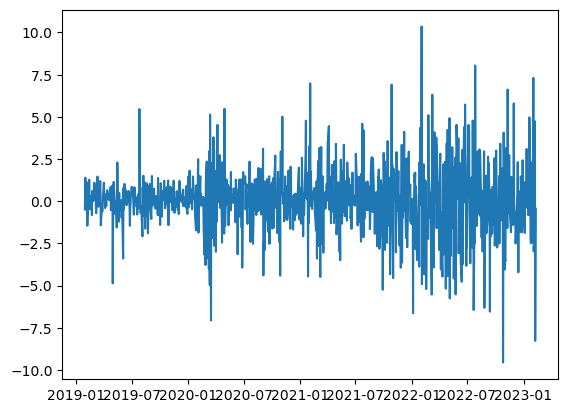

In [23]:
#Visualise difference after remove null rows
plt.plot(difference.dropna()) #dropna(0 means remove null rows)
plt.show()

In [24]:
#check stationary or not new series
#call in main program
adf_test(difference.dropna())

ADF Statistics : -34.05
P-value : 0.00
Reject null hypothesis,Give Time series data is Stationary


In [25]:
#ARIMA :   I(1) d=1

#AR(p) : PACF 
#MA(q) : ACF

In [26]:
#d=1 
#Visualise ACF curve  : 
#inbuilt class plot_acf 
from statsmodels.graphics.tsaplots import plot_acf

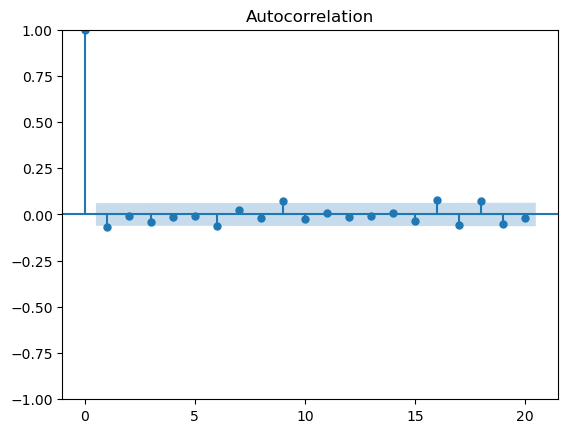

In [27]:
#plot_acf() inbuilt function of class plot_acf
plot_acf(difference.dropna(),lags=20)
plt.show()

In [28]:
#To see ACF curve , order of MA means q=1

In [29]:
#Visualise PACF curve  :  Partial ACF
#inbuilt class plot_pacf 
from statsmodels.graphics.tsaplots import plot_pacf

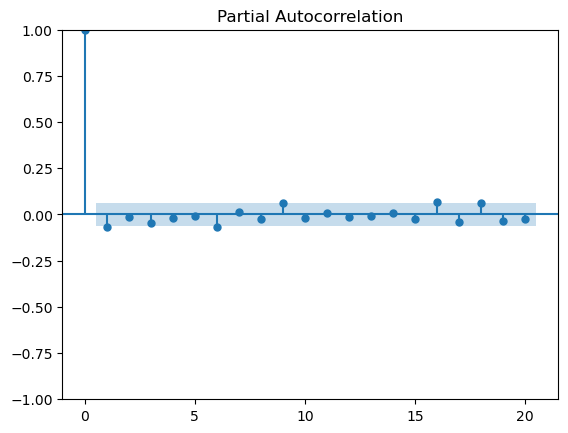

In [30]:
#plot_pacf() inbuilt function of class plot_pacf
plot_pacf(difference.dropna(),lags=20)
plt.show()

In [31]:
#To see PACF curve , order of AR means p=1 

#use ARIMA Model  ARIMA(p,d,q)  AR(p)I(1)MA(q)
#here in this time series data ARIMA(1,1,1)

In [38]:
#Forecast with the help of ARIMA inbuilt class
#from statsmodels.tsa.arima_model import ARIMA
#SARIMAX means seasonality ARIMAX  : It is special version of ARIMA 
#call SARIMAX inbuilt class
import statsmodels.api as sm


In [42]:
import warnings
warnings.filterwarnings('ignore')
#create object of SARIMAx class and passing the following parameter
model=sm.tsa.statespace.SARIMAX(df1['Close'],order=(1,1,1),
                               seasonal_order=(1,1,1,12),trend='c')

#trend can be either linear or exponential(non-linear means cyclic curve)
#if trend is linear than pass 't' in trend parameter
#but if trend exponential then pass 'c' in trend parameter
#seasonal_order=(p,d,q,season)
#season means within years
#if seasonality occurs than pass =12 (12 means 1 years=12 months)


In [43]:
#tran the model with inbuilt method fit() of SARIMAX class
model=model.fit()

In [53]:
df1.tail()

Close
Date                  
2023-02-06  102.900002
2023-02-07  107.639999
2023-02-08   99.370003
2023-02-09   95.010002
2023-02-10   94.570000

In [45]:
df1.shape

(1019, 1)

In [50]:
1019*30//100

305

In [51]:
1019-305

714

In [54]:
#test the model, use inbuilt function predict
Y_pred=model.predict(start=714,end=1018) #714,715,716,......1018

In [55]:
Y_pred

Date
2021-11-24    146.054279
2021-11-26    146.120580
2021-11-29    142.603012
2021-11-30    145.356598
2021-12-01    142.268910
                 ...    
2023-02-06    104.476513
2023-02-07    102.575548
2023-02-08    107.185398
2023-02-09     99.264933
2023-02-10     95.293539
Name: predicted_mean, Length: 305, dtype: float64

In [56]:
#Add new column for Y_pred output in existing dataframe df1
df1['Forecast_Predicted']=Y_pred
df1

Close  Forecast_Predicted
Date                                      
2019-01-28   53.993000                 NaN
2019-01-29   53.502998                 NaN
2019-01-30   54.899502                 NaN
2019-01-31   56.294498                 NaN
2019-02-01   55.931000                 NaN
...                ...                 ...
2023-02-06  102.900002          104.476513
2023-02-07  107.639999          102.575548
2023-02-08   99.370003          107.185398
2023-02-09   95.010002           99.264933
2023-02-10   94.570000           95.293539

[1019 rows x 2 columns]

In [59]:
df1.iloc[714:]

Close  Forecast_Predicted
Date                                      
2021-11-24  146.119995          146.054279
2021-11-26  142.182999          146.120580
2021-11-29  145.530502          142.603012
2021-11-30  141.897507          145.356598
2021-12-01  141.051498          142.268910
...                ...                 ...
2023-02-06  102.900002          104.476513
2023-02-07  107.639999          102.575548
2023-02-08   99.370003          107.185398
2023-02-09   95.010002           99.264933
2023-02-10   94.570000           95.293539

[305 rows x 2 columns]

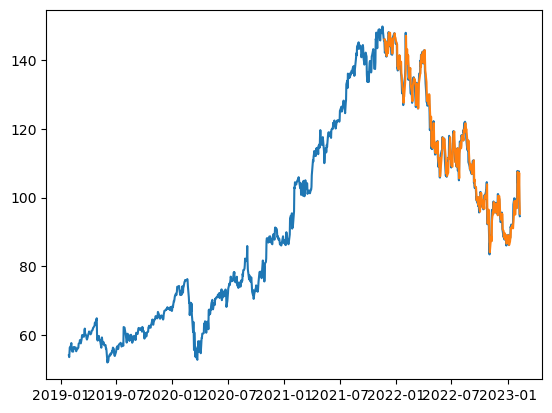

In [60]:
#visualise Actual output and predicted output
plt.plot(df1[['Close','Forecast_Predicted']])
#actual output  df1['Close'] and predicted output df1['Forecast_Predicted']
plt.show()

In [62]:
#find the mean squared error = sum((Actual output-predicted output)**2)/N
#actual ouput df1['Close']
Y_test=df1['Close']
#Y_test.shape
Y_test=Y_test[714:] #start index=714 and end index =till end
Y_test

Date
2021-11-24    146.119995
2021-11-26    142.182999
2021-11-29    145.530502
2021-11-30    141.897507
2021-12-01    141.051498
                 ...    
2023-02-06    102.900002
2023-02-07    107.639999
2023-02-08     99.370003
2023-02-09     95.010002
2023-02-10     94.570000
Name: Close, Length: 305, dtype: float64

In [63]:
Y_test.shape,Y_pred.shape

((305,), (305,))

In [64]:
#find the mean squared error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,Y_pred)
print("mean squared error : ",mse)

mean squared error :  7.492621252391337


In [65]:
#find the r2_score (0-1)
from sklearn.metrics import r2_score
score=r2_score(Y_test,Y_pred)
print("r2_score : ",score)

r2_score :  0.9771315311050408


In [ ]:
#good score 97%
